# Olasılık 

### Dağılımlar 

#### Bernoulli Dağılımı 

In [11]:
from scipy.stats import bernoulli 

Örneğin p tura olsun.

In [12]:
p= 0.6
rv= bernoulli(p)
rv.pmf(1)

0.6

In [14]:
p= 0.6
rv= bernoulli(p)
rv.pmf(0)

0.4

#### Binom dağılımı 

In [7]:
from scipy.stats import binom 

In [8]:
p= 0.01
n= 100
rv= binom(n,p)
print (rv.pmf(1))
print (rv.pmf(5))
print (rv.pmf(10))


0.36972963764971983
0.0028977871237616114
7.006035693977161e-08


#### Poisson Dağılımı 

In [16]:
from scipy.stats import poisson

In [21]:
lambda_=0.1
rv= poisson(mu=lambda_)
print (rv.pmf(0))
print (rv.pmf(3))
print (rv.pmf(5))

0.9048374180359595
0.00015080623633932676
7.54031181696634e-08


#### Normal Dağılım 

In [22]:
from scipy.stats import norm

In [30]:
# 90kdan fazla olması 
1-norm.cdf(90,80,5)

0.02275013194817921

In [31]:
# 73den az olması 
norm.cdf(73,80,5)

0.08075665923377107

In [29]:
#90k-85k arasında olma olasılığı 
norm.cdf(90,80,5)-norm.cdf(85,80,5)

0.13590512198327787

# Tek Örneklem T Testi 

In [7]:
import numpy as np

In [8]:
olcumler=np.array([17,160,234,149,145,107,197,75,201,225,221,119,157,145,127,244,163,114,145,65,112,185,
                   202,146,203,224,203,114,188,156,187,154,177,95,165,50,110,216,138,151,166,135,155,84,
                   251,173,131,207,121,120])

In [9]:
import scipy.stats as stats

In [10]:
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.58, variance=2603.146530612245, skewness=-0.31347192489309805, kurtosis=-0.08115107792019716)

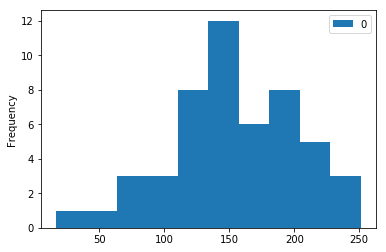

In [11]:
#varsayımlar
#normallik varsayımı
#histogram
import pandas as pd
pd.DataFrame(olcumler).plot.hist();

((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([ 17,  50,  65,  75,  84,  95, 107, 110, 112, 114, 114, 119, 120,
         121, 127, 131, 135, 138, 145, 145, 145, 146, 149, 151, 154, 155,
         156, 157, 160, 163, 165, 166, 173, 177, 185, 187, 188, 197, 201,
         202, 203, 203, 207, 216, 22

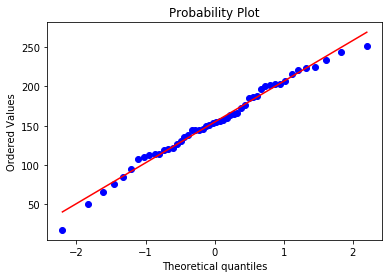

In [12]:
#qqplot
import pylab
stats.probplot(olcumler , dist="norm", plot=pylab)

#çizginin etrafında olduğu için normaldir 

In [13]:
#Shapiro-Wilks Testi (asıl kullanacağımız test mantığı )

h0= Örnek dağılımı ile teorik normal dağılım arasında ist. olarak bir fark yoktur.


h1= ........... vardır.

In [14]:
from scipy.stats import shapiro

In [15]:
shapiro(olcumler)
# (test istatistiği , pi value ) ---> Çıktıların ifade ettikleri kavramlar. 
#  pi value>0.50 old. H0 reddedilemez.
#Normal dağılım varsayımı sağlanmaktadır. o zamn T testi uygulayabiliriz. 

(0.9850037693977356, 0.7717682719230652)

## Hipotez testini uygulanması 

In [16]:
stats.ttest_1samp(olcumler , popmean=170)

Ttest_1sampResult(statistic=-2.137076498104965, pvalue=0.03760889954353998)

p value değeri , çalışmanın başında kabul ettiğimiz alpha= 0.05 değerinden küçük olduğu için H0 hipotezi reddedilir.

Bu da web sitemizde geçirilen sürenin 170 sn'den küçük old. gösterir. Zaten ortalama değerimiz 154 civarındaydı.  yani H0 reddilmiş H1 kabul edilmiş oldu.

### Nonparametrik Tek Örneklem Testi 

In [17]:
from statsmodels.stats.descriptivestats import sign_test

In [18]:
sign_test(olcumler, 170)

(-7.0, 0.06490864707227219)

## Tek Örneklem oran testi 

h0: p= 0.125

h1: p!= 0.125

In [19]:
from statsmodels.stats.proportion import proportions_ztest

In [20]:
count = 40
nobs = 500
value = 0.125

In [21]:
proportions_ztest(count,nobs,value)
# (Zdeğeri istatistiği , p value)
# p value 0.05 den daha küçük old dolayı H0 hipotezini reddediyoruz.
#Yani ürün satın alma değeri 0.125 değişdir bu bilgi yanlıştır. Bunu %95 güvenilirlikle söyleyebiliriz.

(-3.7090151628513017, 0.0002080669689845979)

## Bağımsız iki örneklem T testi ( AB Testi )

İki grup arasında karşılaştırm ayapılmak istenildiğinde kullanılır. 

In [22]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])


A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A","B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [23]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])

#A ve A'nın grubu
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A[:] = "A"
A = pd.concat([A, GRUP_A], axis = 1)

#B ve B'nin Grubu
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis = 1)

#Tum veri
AB = pd.concat([A,B])
AB.columns = ["gelir","GRUP"]
print(AB.head())
print(AB.tail())

   gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir GRUP
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


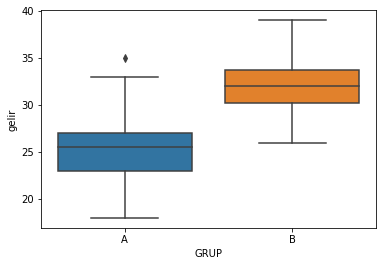

In [24]:
import seaborn as sns
sns.boxplot(x = "GRUP", y = "gelir", data = AB);

In [25]:
from scipy.stats import shapiro

In [26]:
shapiro(A_B.A)

(0.9789242148399353, 0.7962799668312073)

In [28]:
shapiro(A_B.B)

(0.9561261534690857, 0.2458445429801941)

In [29]:
# varyans homojenliği varsayımı 
stats.levene(A_B.A,A_B.B)
# alpha değeri 0.05den küçük olmadığı için h0 ı reddedemiyoruz. Varsayımının sağlandığı anlamına gelir 

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

# Hipotez Testi 

In [30]:
stats.ttest_ind(A_B["A"],A_B["B"], equal_var=True )

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

p value değeri 0.05den küçük old dolayı farklılı vardır ve farklılık olmadığuını iddia eden H0 hipotezi reddedilir. 

In [31]:
test_istatistigi, pvalue = stats.ttest_ind(A_B["A"], A_B["B"], equal_var=True)
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue)) 

# Bir önceki outputta çıkan p value değerindeki log ifadeden bu şekilde kurtulabilir daha kolay
#yorumlayabiliriz. 

Test İstatistiği = -7.0287, p-değeri = 0.0000


# SONUÇ :
Eski sistem ve yeni sistem karşılaştırıldığında bir fark vardır ve bu fark yeni sistem lehinedir. 

# Bağımlı iki örneklem T Testi 

H0: M1 = M2

H1: M1 != M2

In [33]:
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
            121,118,124,121,125,115,115,119,118,121,117,117,120,120,
            121,117,118,117,123,118,124,121,115,118,125,115])

sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
             134,134,124,140,134,129,129,138,134,124,122,126,133,127,
             130,130,130,132,117,130,125,129,133,120,127,123])

Diyelim ki bir excel ya da txt dosyasından veri çektik. Verileri bu şekilde DataFrame'e dönüştürebiliriz. 

In [34]:
#BIRINCI VERI SETI
AYRIK = pd.concat([oncesi, sonrasi], axis = 1)
AYRIK.columns = ["ONCESI","SONRASI"]
print("'AYRIK' Veri Seti: \n\n ", AYRIK.head(), "\n\n")


#IKINCI VERI SETI
#ONCESI FLAG/TAG'INI OLUSTURMA
GRUP_ONCESI = np.arange(len(oncesi))
GRUP_ONCESI = pd.DataFrame(GRUP_ONCESI)
GRUP_ONCESI[:] = "ONCESI"
#FLAG VE ONCESI DEGERLERINI BIR ARAYA GETIRME
A = pd.concat([oncesi, GRUP_ONCESI], axis = 1)
#SONRASI FLAG/TAG'INI OLUSTURMA
GRUP_SONRASI = np.arange(len(sonrasi))
GRUP_SONRASI = pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:] = "SONRASI"

#FLAG VE SONRASI DEGERLERINI BIR ARAYA GETIRME
B = pd.concat([sonrasi, GRUP_SONRASI], axis = 1)

#TUM VERIYI BIR ARAYA GETIRME
BIRLIKTE = pd.concat([A,B])
BIRLIKTE

#ISIMLENDIRME
BIRLIKTE.columns = ["PERFORMANS","ONCESI_SONRASI"]
print("'BIRLIKTE' Veri Seti: \n\n", BIRLIKTE.head(), "\n")

'AYRIK' Veri Seti: 

     ONCESI  SONRASI
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129 


'BIRLIKTE' Veri Seti: 

    PERFORMANS ONCESI_SONRASI
0         123         ONCESI
1         119         ONCESI
2         119         ONCESI
3         116         ONCESI
4         123         ONCESI 



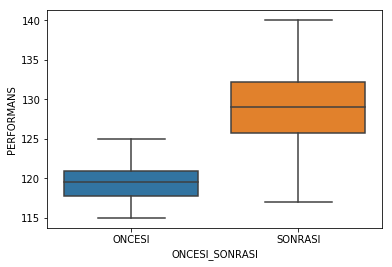

In [38]:
sns.boxplot(x= "ONCESI_SONRASI", y = "PERFORMANS", data=BIRLIKTE);
# Henüz testler yapılmadı fakat. Şuanda bu grafik ile bir önbilgiye ulaşabiliyoruz. 
#Eğitim kesinlikle etkili olmuş. 

Bağımlı İki Örneklem Varsayım Testi 

In [39]:
from scipy.stats import shapiro

In [45]:
shapiro(AYRIK.ONCESI)
# pvalue değeri 0.05den küçük değildir. 
#H0 değeri öncesi sonrası fark yoktur diyordu. pvalue değeri 0.05den büyük old için 
#H0 hipotezini reddedemeyiz. Örneğin dağılımı normaldir. 

(0.9543654918670654, 0.10722342133522034)

In [47]:
shapiro(AYRIK.SONRASI)


(0.9780087471008301, 0.6159457564353943)

In [48]:
import scipy.stats as stats
#ikinci varsayımlarda levene fonk kullanılır. 
stats.levene(AYRIK.ONCESI, AYRIK.SONRASI)
#Burda alfa değeri 0.05den küççüktür. Bu durumda H0 hip. reddedilmek durumundadır. 
#Fakat bazı durumlarda bu göz ardı edilip testlere devam edilebilir .

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

Bağımlı İki Örneklem T Testi 

In [56]:
stats.ttest_rel(AYRIK.ONCESI, AYRIK.SONRASI)

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

In [58]:
test_istatistigi, pvalue = stats.ttest_rel(AYRIK["ONCESI"], AYRIK["SONRASI"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue)) 

Test İstatistiği = -9.2815, p-değeri = 0.0000


In [ ]:
#Burada p value değeri 0.05den küçük çıktığı için H0 hipotezi reddedilir. Eğitim işe yaramıştır sonucuna 
# ulaşılır. 

# Non Parametrik bağımlı iki örneklem testi 

In [59]:
stats.wilcoxon(AYRIK.ONCESI, AYRIK.SONRASI)

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

# İki Örneklem Oran Testi 

H0: Eşittir

H1: Farklıdır

In [61]:
from statsmodels.stats.proportion import proportions_ztest

In [65]:
import numpy as np
basari_sayisi=np.array([300,250])
gozlem_sayisi=np.array([1000,1100])

In [69]:
proportions_ztest( count= basari_sayisi, nobs=gozlem_sayisi)
# H0 hipotezi reddedilir. 

(3.7857863233209255, 0.0001532232957772221)

# Varyans Analizi 

H0: M1 = M2 = M3 (grup ortalamalari arasinda ist anl. farklilik yoktur)

H1: Fark vardir.

In [70]:
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,34,28,32,31,28,33,29])

B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,29,26,37,31,28,34,33])

C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,40,39,38,38,43,40,42])

dfs = [A, B, C]

ABC = pd.concat(dfs, axis = 1)
ABC.columns = ["GRUP_A","GRUP_B","GRUP_C"]
ABC.head()

,GRUP_A,GRUP_B,GRUP_C
0,28,31,40
1,33,32,33
2,30,30,38
3,29,30,41
4,28,33,42


### Varsayım Kontrolü 

In [71]:
from scipy.stats import shapiro

In [73]:
shapiro(ABC["GRUP_A"])

(0.9697431921958923, 0.5321715474128723)

In [74]:
shapiro(ABC["GRUP_B"])

(0.9789854884147644, 0.7979801297187805)

In [75]:
shapiro(ABC["GRUP_C"])

(0.9579201340675354, 0.273820161819458)

In [ ]:
# Tüm grupların p value değerleri 0.05den büyüktür bu sebeple H0ı reddemeyiz. 

In [78]:
stats.levene(ABC["GRUP_A"],ABC["GRUP_B"],ABC["GRUP_C"])
#p value değerleri 0.05den büyüktür ve yani normallik ve varyanslar homojendir ve varsayım 
#sağlanmıştır diyoruz. 

LeveneResult(statistic=1.0267403645055275, pvalue=0.36247110117417064)

### Hipotez Testi 

In [80]:
from scipy.stats import  f_oneway 

In [81]:
f_oneway(ABC["GRUP_A"],ABC["GRUP_B"],ABC["GRUP_C"])

F_onewayResult(statistic=74.69278140730431, pvalue=1.3079050746811477e-19)

In [83]:
#Başka bir p value değeri düzgün yazdırma örneği 
print ( "{:.5f}".format(f_oneway(ABC["GRUP_A"],ABC["GRUP_B"],ABC["GRUP_C"])[1]))
# p value değerine tekrar bakılır ve H0 hipotezi reddedilir. Gruplar arasında farklılık vardır denir. 

0.00000


In [84]:
#Peki en iyi performansı veren grup hangisi ?
ABC.describe().T
# Grup C

,count,mean,std,min,25%,50%,75%,max
GRUP_A,30.0,30.133333,2.224214,25.0,28.25,30.0,31.75,34.0
GRUP_B,30.0,31.700000,2.937862,26.0,30.00,31.0,34.00,38.0
GRUP_C,30.0,38.100000,2.808239,33.0,36.00,38.0,40.00,43.0


# KORELASYON ANALİZİ 

In [94]:
import seaborn as sns 
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [95]:
df["total_bill"]=df["total_bill"]- df["tip"]
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


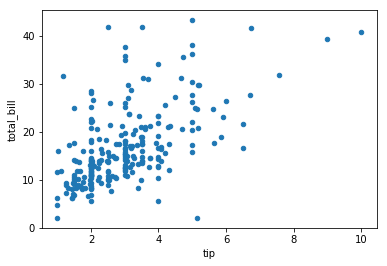

In [97]:
df.plot.scatter("tip","total_bill");
# total_bill arttıkça tip artmıştır. 

### Korelasyon varsayım kont 

In [98]:
test_istatistigi, pvalue = shapiro(df["tip"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

test_istatistigi, pvalue = shapiro(df["total_bill"])
print('Test İstatistiği = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Test İstatistiği = 0.8978, p-değeri = 0.0000
Test İstatistiği = 0.9136, p-değeri = 0.0000


In [ ]:
# H0 reddedilmiş. H0 reddedilmemilş gibi devam ediyoruz. 

Korelasyon KAtsayısı 

In [105]:
import seaborn as sns 
df["tip"].corr(df["total_bill"] , method= "spearman")

0.593691939408997

Korelasyon Anlamlılığı 

In [106]:
from scipy.stats.stats import pearsonr

In [108]:
test_istatistigi, pvalue = pearsonr(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))
#DEğişkenler arasında anlamlı bir ilişki yoktur diyen H0 hip reddiyoruz. 
#DEğişkenler arasında anlamlı bir ilişki vardır diyoruz. 

Korelasyon Katsayısı = 0.5767, p-değeri = 0.0000


Nonparametrik hip Testi 

In [109]:
from scipy.stats import stats
stats.spearmanr(df["tip"],df["total_bill"])
#DEğişkenler arasında anlamlı bir ilişki yoktur diyen H0 hip reddiyoruz. 
#DEğişkenler arasında anlamlı bir ilişki vardır diyoruz. 

SpearmanrResult(correlation=0.593691939408997, pvalue=1.2452285137560276e-24)

In [110]:
test_istatistigi, pvalue = stats.spearmanr(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.5937, p-değeri = 0.0000


In [111]:
test_istatistigi, pvalue = stats.kendalltau(df["tip"],df["total_bill"])

print('Korelasyon Katsayısı = %.4f, p-değeri = %.4f' % (test_istatistigi, pvalue))

Korelasyon Katsayısı = 0.4401, p-değeri = 0.0000


In [ ]:
# Biz tip probleminde iki değer arasoında ilişki olup olmadığını varsa analamlı olup olmadığını merak ediyorduk
#buna korelasyon testi ile baktık. Ama öncesinde varsayımları inceledir. Varsayım sağlanıyorsa pearson
# varsayım sağlanmıyorsa spearman korelasyon katsayısını kullanırız. İlgili korelasyon katsayısı ile 
#hipotez testini gerçekleştirdğimizde buna yorum yaptık. 